In [ ]:
import pandas as pd
import openpyxl
import warnings
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import utils as eda
import numpy as np
import utils as eda

def warn(*args, **kwargs):
    pass
warnings.warn = warn
#warnings.filterwarnings("ignore", category=FutureWarning)
print("Librerias cargadas")

Librerias cargadas


: 

In [ ]:
try:
    ratings = pd.read_csv("../data/interim/movies-data/ml-32m/ratings.csv")
    print("Dataset existente")
except:
    ratings = pd.read_csv("../data/interim/movies-data/ml-32m/ratings.csv")
    print("Dataset extraído")

In [ ]:
target='ratings'
eda.analisis(ratings) #Primer contacto cn dataset ratings

Variables numéricas: ['userId', 'movieId', 'rating', 'timestamp']
Variables no numéricas: []

Shape del dataset: (32000204, 4)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None

Valores nulos por columna:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Filas duplicadas:
Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []


Analisis de resultados: 
1. No existen filas duplicadas
2. No existen datos nulos

In [ ]:
# Análisis de valores únicos
print("VALORES ÚNICOS:")
print(f"Usuarios únicos: {ratings['userId'].nunique():,}")
print(f"Películas únicas: {ratings['movieId'].nunique():,}")

VALORES ÚNICOS:
Usuarios únicos: 200,948
Películas únicas: 84,432


In [ ]:
#  HISTORIAL DE CADA USUARIO: películas vistas y calificaciones
print("\nHISTORIAL POR USUARIO ")
user_history = ratings.groupby('userId').agg({
    'movieId': 'count',  # películas vistas
    'rating': ['mean', 'std']
}).round(2)
user_history.columns = ['peliculas_vistas', 'rating_promedio', 'rating_std']
print(user_history)


HISTORIAL POR USUARIO 
        peliculas_vistas  rating_promedio  rating_std
userId                                               
1                    141             3.53        1.54
2                     52             4.27        1.12
3                    147             3.59        1.01
4                     27             2.63        1.04
5                     33             3.27        0.91
...                  ...              ...         ...
200944               298             3.95        0.62
200945               108             3.10        1.90
200946                23             4.39        0.58
200947                61             3.95        0.65
200948               236             3.60        1.24

[200948 rows x 3 columns]


In [ ]:
# Distribución de ratings por usuario
user_rating_counts = ratings['userId'].value_counts()
print(" DISTRIBUCIÓN DE ACTIVIDAD DE USUARIOS:")
print(f"Mediana de ratings por usuario: {user_rating_counts.median()}")

 DISTRIBUCIÓN DE ACTIVIDAD DE USUARIOS:
Mediana de ratings por usuario: 73.0


In [ ]:
movie_features = ratings.groupby('movieId').agg(
    total_ratings=('rating', 'count'),
    avg_rating=('rating', 'mean'),
    std_rating=('rating', 'std')).reset_index().sort_values('avg_rating', ascending=False)

print("\n TOP 10 PELÍCULAS MEJOR VALORADAS:")
print(movie_features[['movieId', 'avg_rating', 'total_ratings']].head(10).to_string(index=False))

Features de películas ORDENADAS por avg_rating (MAYOR a MENOR):
       movieId  total_ratings  avg_rating  std_rating
73930   255017              1         5.0         NaN
73724   253968              1         5.0         NaN
84340   291977              1         5.0         NaN
84339   291975              1         5.0         NaN
30426   137769              1         5.0         NaN
30414   137743              1         5.0         NaN
30409   137731              1         5.0         NaN
30438   137805              1         5.0         NaN
73629   253566              1         5.0         NaN
73904   254803              1         5.0         NaN

 TOP 10 PELÍCULAS MEJOR VALORADAS:
 movieId  avg_rating  total_ratings
  255017         5.0              1
  253968         5.0              1
  291977         5.0              1
  291975         5.0              1
  137769         5.0              1
  137743         5.0              1
  137731         5.0              1
  137805         5

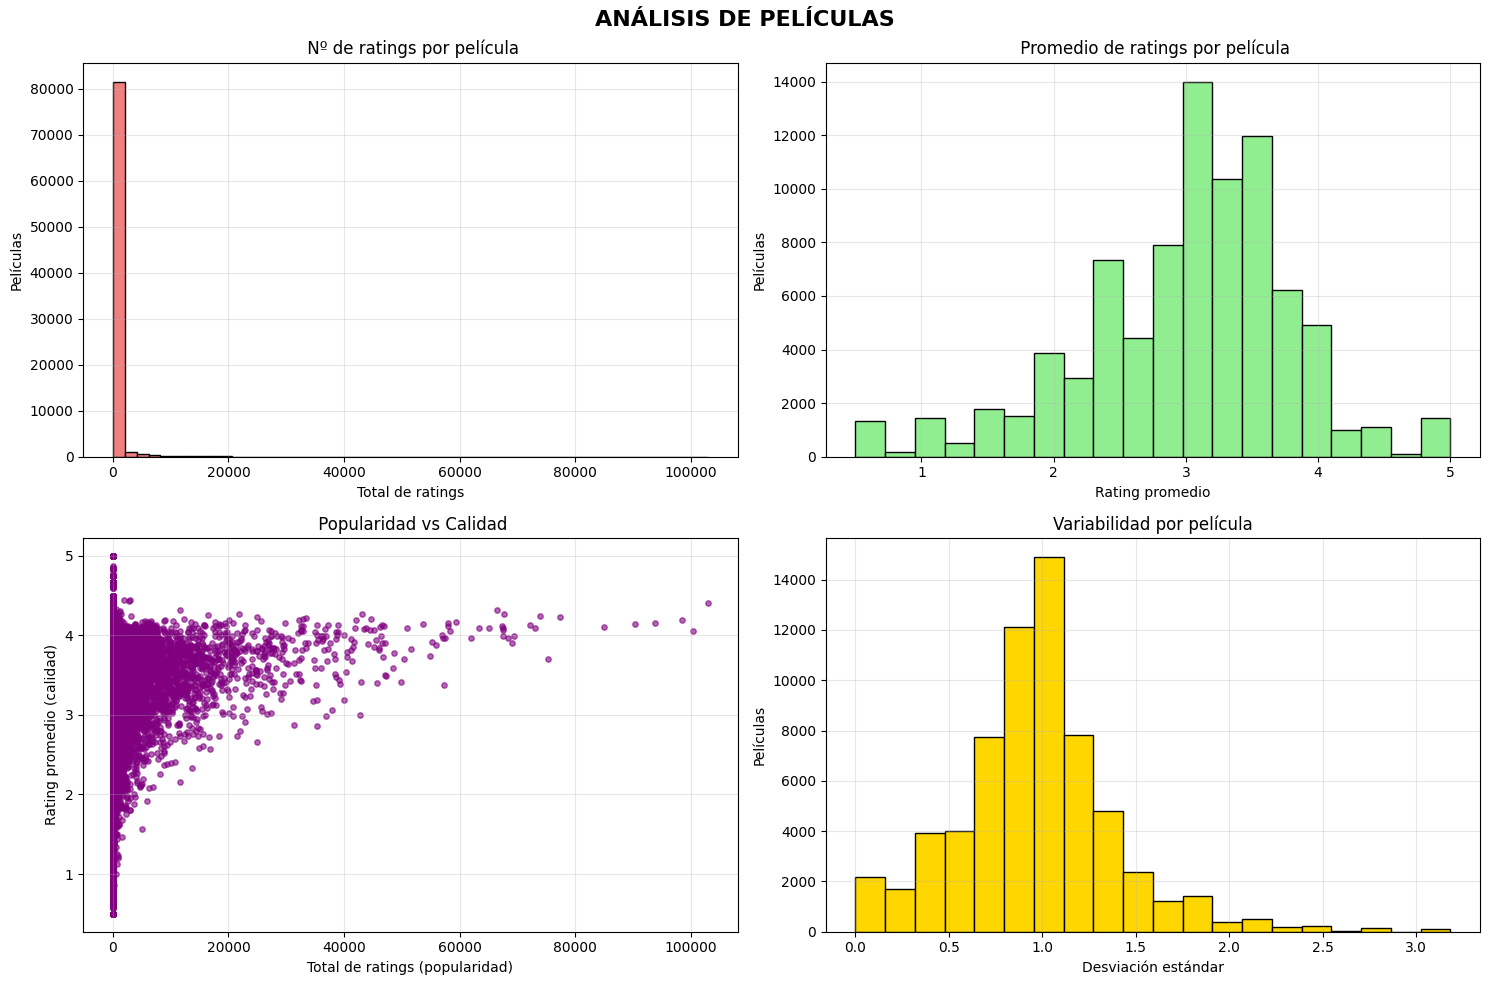

In [ ]:
# Visualizaciones

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('ANÁLISIS DE PELÍCULAS', fontsize=16, fontweight='bold')

# 1. Distribución de cantidad de ratings por película
axes[0,0].hist(movie_features['total_ratings'], bins=50, color='lightcoral', edgecolor='black')
axes[0,0].set_title(' Nº de ratings por película')
axes[0,0].set_xlabel('Total de ratings')
axes[0,0].set_ylabel('Películas')
axes[0,0].grid(True, alpha=0.3)

# 2. Distribución del rating promedio por película
axes[0,1].hist(movie_features['avg_rating'], bins=20, color='lightgreen', edgecolor='black')
axes[0,1].set_title(' Promedio de ratings por película')
axes[0,1].set_xlabel('Rating promedio')
axes[0,1].set_ylabel('Películas')
axes[0,1].grid(True, alpha=0.3)

# 3. Relación popularidad-calidad
axes[1,0].scatter(movie_features['total_ratings'], movie_features['avg_rating'], 
                  alpha=0.6, s=15, color='purple')
axes[1,0].set_title(' Popularidad vs Calidad')
axes[1,0].set_xlabel('Total de ratings (popularidad)')
axes[1,0].set_ylabel('Rating promedio (calidad)')
axes[1,0].grid(True, alpha=0.3)

# 4. Variabilidad de ratings por película
axes[1,1].hist(movie_features['std_rating'].dropna(), bins=20, color='gold', edgecolor='black')
axes[1,1].set_title('Variabilidad por película')
axes[1,1].set_xlabel('Desviación estándar')
axes[1,1].set_ylabel('Películas')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Analisis de resultado:
1. Nº Ratings por pelicula: Se observa una larga cola.
La gran mayoría de películas tienen muy pocos ratings (la barra gigante pegada al cero).
Solo unas pocas películas alcanzan decenas de miles de calificaciones.

2. Promedio de Rating por pelicula: La distribución es asimétrica positiva, centrada entre 3.0 y 4.0
Muy pocas películas con promedio menor a 2.0.
Muy pocas logran un promedio cercano a 5.0.
Esto muestra que los usuarios tienden a ser benevolentes, es raro que pongan notas muy bajas.


3. Vemos tres patrones claros:
Blockbusters: muchas calificaciones y rating promedio estable.
Regulares: muchas calificaciones pero promedio normalito (≈3.0).
Joyas ocultas: películas con pocos ratings pero promedios altos (>4).
Esto revela un trade-off: recomendar solo por promedio puede ser sesgado (pocas opiniones confiables), recomendar solo por popularidad quita descubrimiento.

Usaremos un ranking ponderado IMDb, donde el rating se ajusta por el número de votos.

4. Variabilidad (std) por película.
La mayoría de películas tienen una desviación estándar entre 0.5 y 1.0,
lo que significa que los usuarios coinciden bastante en su percepción.
Algunas películas tienen variabilidad >2, lo que indica opiniones polarizantes (a unos les encanta, a otros les parece horrible).


In [ ]:
#usamos un ranking ponderado estilo IMDb 

# Compute features de películas
movie_features = ratings.groupby('movieId').agg(
    v=('rating', 'count'),
    R=('rating', 'mean')
).reset_index()
print('Calculo Realizado')

Calculo Realizado


In [ ]:
# Calcular parámetros globales
C = ratings['rating'].mean()   # Rating promedio global
m = movie_features['v'].quantile(0.90)   # Umbral de votos: percentil 90

print(f" C (promedio global): {C:.2f}")
print(f" m (umbral mínimo de votos - percentil 90): {m}")

In [ ]:
# Seleccionar solo películas que cumplen con el mínimo
qualified = movie_features[movie_features['v'] >= m].copy()
print("SELECCIONADAS")

In [ ]:
# Calcular Weighted Rating (IMDb) filtrando peliculas sin suficientes votos
qualified['WR'] = (
    (qualified['v'] / (qualified['v'] + m)) * qualified['R']
    + (m / (qualified['v'] + m)) * C
)
print(qualified)

In [ ]:
# Calcular Weighted Rating (IMDb) para TODAS

movie_features['WR'] = (
    (movie_features['v'] / (movie_features['v'] + m)) * movie_features['R'] +
    (m / (movie_features['v'] + m)) * C
)
print('IMDb calculado')
print(movie_features)

In [ ]:
#  Comparación GRÁFICA

plt.figure(figsize=(12, 8))
plt.scatter(movie_features['R'], movie_features['WR'], 
            alpha=0.5, s=15, c=movie_features['v'], cmap="viridis")
plt.colorbar(label="Número de ratings (v)")
plt.title("IMDb Weighted Rating vs Rating Promedio (todas las películas)")
plt.xlabel("Rating Promedio (R)")
plt.ylabel("Weighted Rating (WR)")
plt.grid(True, alpha=0.3)
plt.show()

Analisis de resultado:
1. Películas con pocos ratings y promedio alto (≈5.0)
En WR bajan a ~3.5 porque el sistema “no confía aún” en ellas. 
Esto evita que una película con 10 calificaciones de 5.0 aparezca injustamente en el #1.
Películas muy votadas (blockbusters)
2. Su WR casi coincide con su R porque tienen suficiente volumen (su evidencia es fuerte).
Ejemplo: una película con miles de votos y promedio 4.2 seguirá dominando arriba.
Películas mediocres (R ~2.5)
→ Mantienen un WR acorde, aunque ligeramente suavizado si tienen pocos votos.

El método IMDb es más justo y robustopermite un ranking que valora tanto calidad como popularidad.
Blockbusters ganan consistencia: se aseguran en el Top gracias a su alto número de ratings.
Joyas ocultas equilibradas: se posicionan en la media global mientras ganan más votos.
Protección contra sesgo: evita que películas poco votadas con 5.0 inflen el ranking.

In [ ]:
# Distribución de Weighted Ratings

plt.figure(figsize=(10,6))
plt.hist(movie_features['WR'], bins=40, color="coral", edgecolor="black", alpha=0.7)
plt.title(" Distribución de Weighted Ratings (IMDb) - Todas las películas")
plt.xlabel("Weighted Rating (WR)")
plt.ylabel("Número de películas")
plt.grid(True, alpha=0.3)
plt.show()

Analisis de resultados:
1. Películas poco votadas: se “aplastan” alrededor de 3.5, sin importar si tenían 5.0 o 2.0 en promedio.
2. Películas con muchísimos votos: logran moverse significativamente hacia arriba o abajo, reflejando la opinión masiva de los usuarios.
3. Resultado: un ranking más justo y robusto que no sobrevalora películas con pocos votos.


----------------------------------------------------------------------------

In [ ]:
# 4. DISTRIBUCIÓN DE RATINGS
rating_dist = ratings['rating'].value_counts().sort_index()

In [ ]:


# 5. SPARSITY CHECK
total_possible_ratings = ratings['userId'].nunique() * ratings['movieId'].nunique()
actual_ratings = len(ratings)
sparsity = (1 - actual_ratings / total_possible_ratings) * 100
print(f"\n=== 5. SPARSITY ===")
print(f"Sparsity: {sparsity:.2f}%")

In [ ]:

# 6. TARGETS: VECTORES DE GUSTOS POR USUARIO
print("\n=== 6. CREANDO TARGETS ===")

# Normalizar ratings por usuario (Z-score)
user_stats = ratings.groupby('userId')['rating'].agg(['mean', 'std']).reset_index()
ratings_normalized = ratings.merge(user_stats, on='userId')
ratings_normalized['rating_normalized'] = (
    (ratings_normalized['rating'] - ratings_normalized['mean']) / 
    (ratings_normalized['std'] + 1e-8)
)

# Simular géneros para crear vectores de gustos
np.random.seed(42)
genres = ['Action', 'Comedy', 'Drama', 'Horror', 'Romance', 'Sci-Fi', 'Thriller']
movie_genres = pd.DataFrame({
    'movieId': ratings['movieId'].unique(),
    'genre': np.random.choice(genres, len(ratings['movieId'].unique()))
})

ratings_with_genre = ratings_normalized.merge(movie_genres, on='movieId')
user_genre_preferences = ratings_with_genre.groupby(['userId', 'genre'])['rating_normalized'].mean().unstack(fill_value=0)

In [ ]:



# ===== GRÁFICOS =====

# FIGURA 1: ANÁLISIS DE USUARIOS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISIS DE USUARIOS - COMPORTAMIENTO Y PATRONES', fontsize=16, fontweight='bold')

# 1.1 Películas vistas por usuario
axes[0,0].hist(user_history['peliculas_vistas'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].axvline(user_history['peliculas_vistas'].median(), color='red', linestyle='--')
axes[0,0].set_title('Distribución: Películas vistas por usuario')
axes[0,0].set_xlabel('Número de películas vistas')
axes[0,0].set_ylabel('Número de usuarios')

# 1.2 Rating promedio por usuario
axes[0,1].hist(user_history['rating_promedio'], bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Distribución: Rating promedio por usuario')
axes[0,1].set_xlabel('Rating promedio del usuario')
axes[0,1].set_ylabel('Número de usuarios')

# 1.3 Actividad vs Rating promedio
axes[1,0].scatter(user_history['peliculas_vistas'], user_history['rating_promedio'], alpha=0.6, s=20)
axes[1,0].set_title('Actividad vs Rating Promedio del Usuario')
axes[1,0].set_xlabel('Películas vistas')
axes[1,0].set_ylabel('Rating promedio')

# 1.4 Variabilidad por usuario
axes[1,1].hist(user_history['rating_std'].dropna(), bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[1,1].set_title('Variabilidad de ratings por usuario')
axes[1,1].set_xlabel('Desviación estándar de ratings')
axes[1,1].set_ylabel('Número de usuarios')

plt.tight_layout()
plt.show()

# FIGURA 2: ANÁLISIS DE PELÍCULAS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISIS DE PELÍCULAS - POPULARIDAD Y CALIDAD', fontsize=16, fontweight='bold')

# 2.1 Popularidad de películas
axes[0,0].hist(movie_popularity['num_ratings'], bins=40, color='coral', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribución: Popularidad de películas')
axes[0,0].set_xlabel('Número de ratings por película')
axes[0,0].set_ylabel('Número de películas')
axes[0,0].set_yscale('log')

# 2.2 Popularidad vs Calidad
scatter = axes[0,1].scatter(movie_popularity['num_ratings'], movie_popularity['avg_rating'], 
                           alpha=0.6, s=30, c=movie_popularity['std_rating'], cmap='viridis')
axes[0,1].set_title('Popularidad vs Calidad')
axes[0,1].set_xlabel('Número de ratings')
axes[0,1].set_ylabel('Rating promedio')
plt.colorbar(scatter, ax=axes[0,1])

# 2.3 Distribución general de ratings
axes[1,0].bar(rating_dist.index, rating_dist.values, color='gold', edgecolor='black')
axes[1,0].set_title('Distribución General de Ratings')
axes[1,0].set_xlabel('Rating')
axes[1,0].set_ylabel('Frecuencia')

# 2.4 Sparsity visualization
sparsity_data = [100-sparsity, sparsity]
axes[1,1].pie(sparsity_data, labels=['Datos\nExistentes', 'Datos\nFaltantes'], 
              colors=['lightgreen', 'lightcoral'], autopct='%1.1f%%')
axes[1,1].set_title(f'Sparsity: {sparsity:.1f}%')

plt.tight_layout()
plt.show()

# FIGURA 3: VECTORES DE GUSTOS Y TARGETS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISIS DE TARGETS Y VECTORES DE GUSTOS', fontsize=16, fontweight='bold')

# 3.1 Ratings normalizados
axes[0,0].hist(ratings_normalized['rating_normalized'], bins=40, color='lightsteelblue', edgecolor='black')
axes[0,0].axvline(0, color='red', linestyle='--', label='Media = 0')
axes[0,0].set_title('Ratings Normalizados por Usuario')
axes[0,0].set_xlabel('Rating Normalizado (Z-score)')
axes[0,0].legend()

# 3.2 Preferencias por género
genre_avg_prefs = user_genre_preferences.mean().sort_values(ascending=True)
axes[0,1].barh(range(len(genre_avg_prefs)), genre_avg_prefs.values, color='lightcoral')
axes[0,1].set_title('Preferencias Promedio por Género')
axes[0,1].set_yticks(range(len(genre_avg_prefs)))
axes[0,1].set_yticklabels(genre_avg_prefs.index)

# 3.3 Heatmap de preferencias (muestra)
sample_users = user_genre_preferences.head(20)
sns.heatmap(sample_users, ax=axes[1,0], cmap='RdBu_r', center=0)
axes[1,0].set_title('Preferencias por Género (20 usuarios)')

# 3.4 Similitud entre usuarios
user_similarity = cosine_similarity(user_genre_preferences.fillna(0))
similarity_values = user_similarity[np.triu_indices_from(user_similarity, k=1)]
axes[1,1].hist(similarity_values, bins=30, color='gold', edgecolor='black')
axes[1,1].set_title('Similitudes entre Usuarios')
axes[1,1].set_xlabel('Similitud Coseno')

plt.tight_layout()
plt.show()

print("✅ ANÁLISIS COMPLETO TERMINADO")
